# Preamble 

In [34]:
wld_dir = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD'
wld_pkg = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/WeakLensingDeblending'

import os
os.chdir(wld_dir)

%matplotlib inline

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble
import mycode.weights as weights 
import mycode.maps as maps 
import corner 
from tqdm import tqdm 

%run mycode/preamble.py

In [2]:
from importlib import reload
reload(errors)
reload(weights)
reload(preamble)
reload(maps)
reload(corner)

<module 'corner' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/miniconda3/envs/igalsim/lib/python3.7/site-packages/corner/__init__.py'>

# Read catalogues 


In [8]:
#filters to apply as reading the catalogue. 
prefilters = [
    maps.get_non_duplicated_cat
]

ffilters = [maps.good, maps.best]

In [9]:
#default step size
cat_name1 = "final_fitsLSST7"
main_catsLSST = maps.retrieve_cats("final_fitsLSST", only_zero_shear=True)
pfmain_catsLSST = maps.get_filter_cats(main_catsLSST, prefilters)
cat1 = pfmain_catsLSST[0]

scat1 = maps.get_filter_cats(pfmain_catsLSST, ffilters)[0]

retrieving zero shear cat from default step size catalogue...


In [10]:
#0.001 step size on shear. 
cat_name2 = "final_fitsLSST5_ss1"
main_catsLSST_ss1 = maps.retrieve_cats("final_fitsLSST_ss", only_zero_shear=True)
pfmain_catsLSST_ss1 = maps.get_filter_cats(main_catsLSST_ss1, prefilters)
cat2 = pfmain_catsLSST_ss1[0]

scat2 = maps.get_filter_cats(pfmain_catsLSST_ss1, ffilters)[0]

retrieving zero shear cat from step size .001 catalogue...


# Construct triangle plot using corner 

In [36]:
all_cats = maps.get_intersection_cats([scat1,scat2])

def keep_quantiles(dbt, p=0.005, p2=None): 
    q1 = np.quantile(dbt, p)
    if p2 is None: 
        q2 = np.quantile(dbt, 1-p)
    else: 
        q2 = np.quantile(dbt, p2)
    return weights.cut_both(dbt, q1, q2)

params = ['bias_f', 'bias_s', 'bias_x', 'bias_y', 'bias_g1', 'bias_g2']
params_grp = [param+'_grp' for param in params]
    

## Bleding off 

In [27]:
# get biases in the corner.py format (blending off and on)

biases_1 = np.array([list(all_cats[0][param]) for param in params]).T
#biases_grp

biases_2 = np.array([list(all_cats[1][param]) for param in params]).T

In [28]:
all_biases = np.hstack([biases_1, biases_2])

In [32]:
all_params = ['bias_f1', 'bias_s1', 'bias_x1', 'bias_y1', 'bias_g11', 'bias_g21', 
              'bias_f2', 'bias_s2', 'bias_x2', 'bias_y2', 'bias_g12', 'bias_g22']



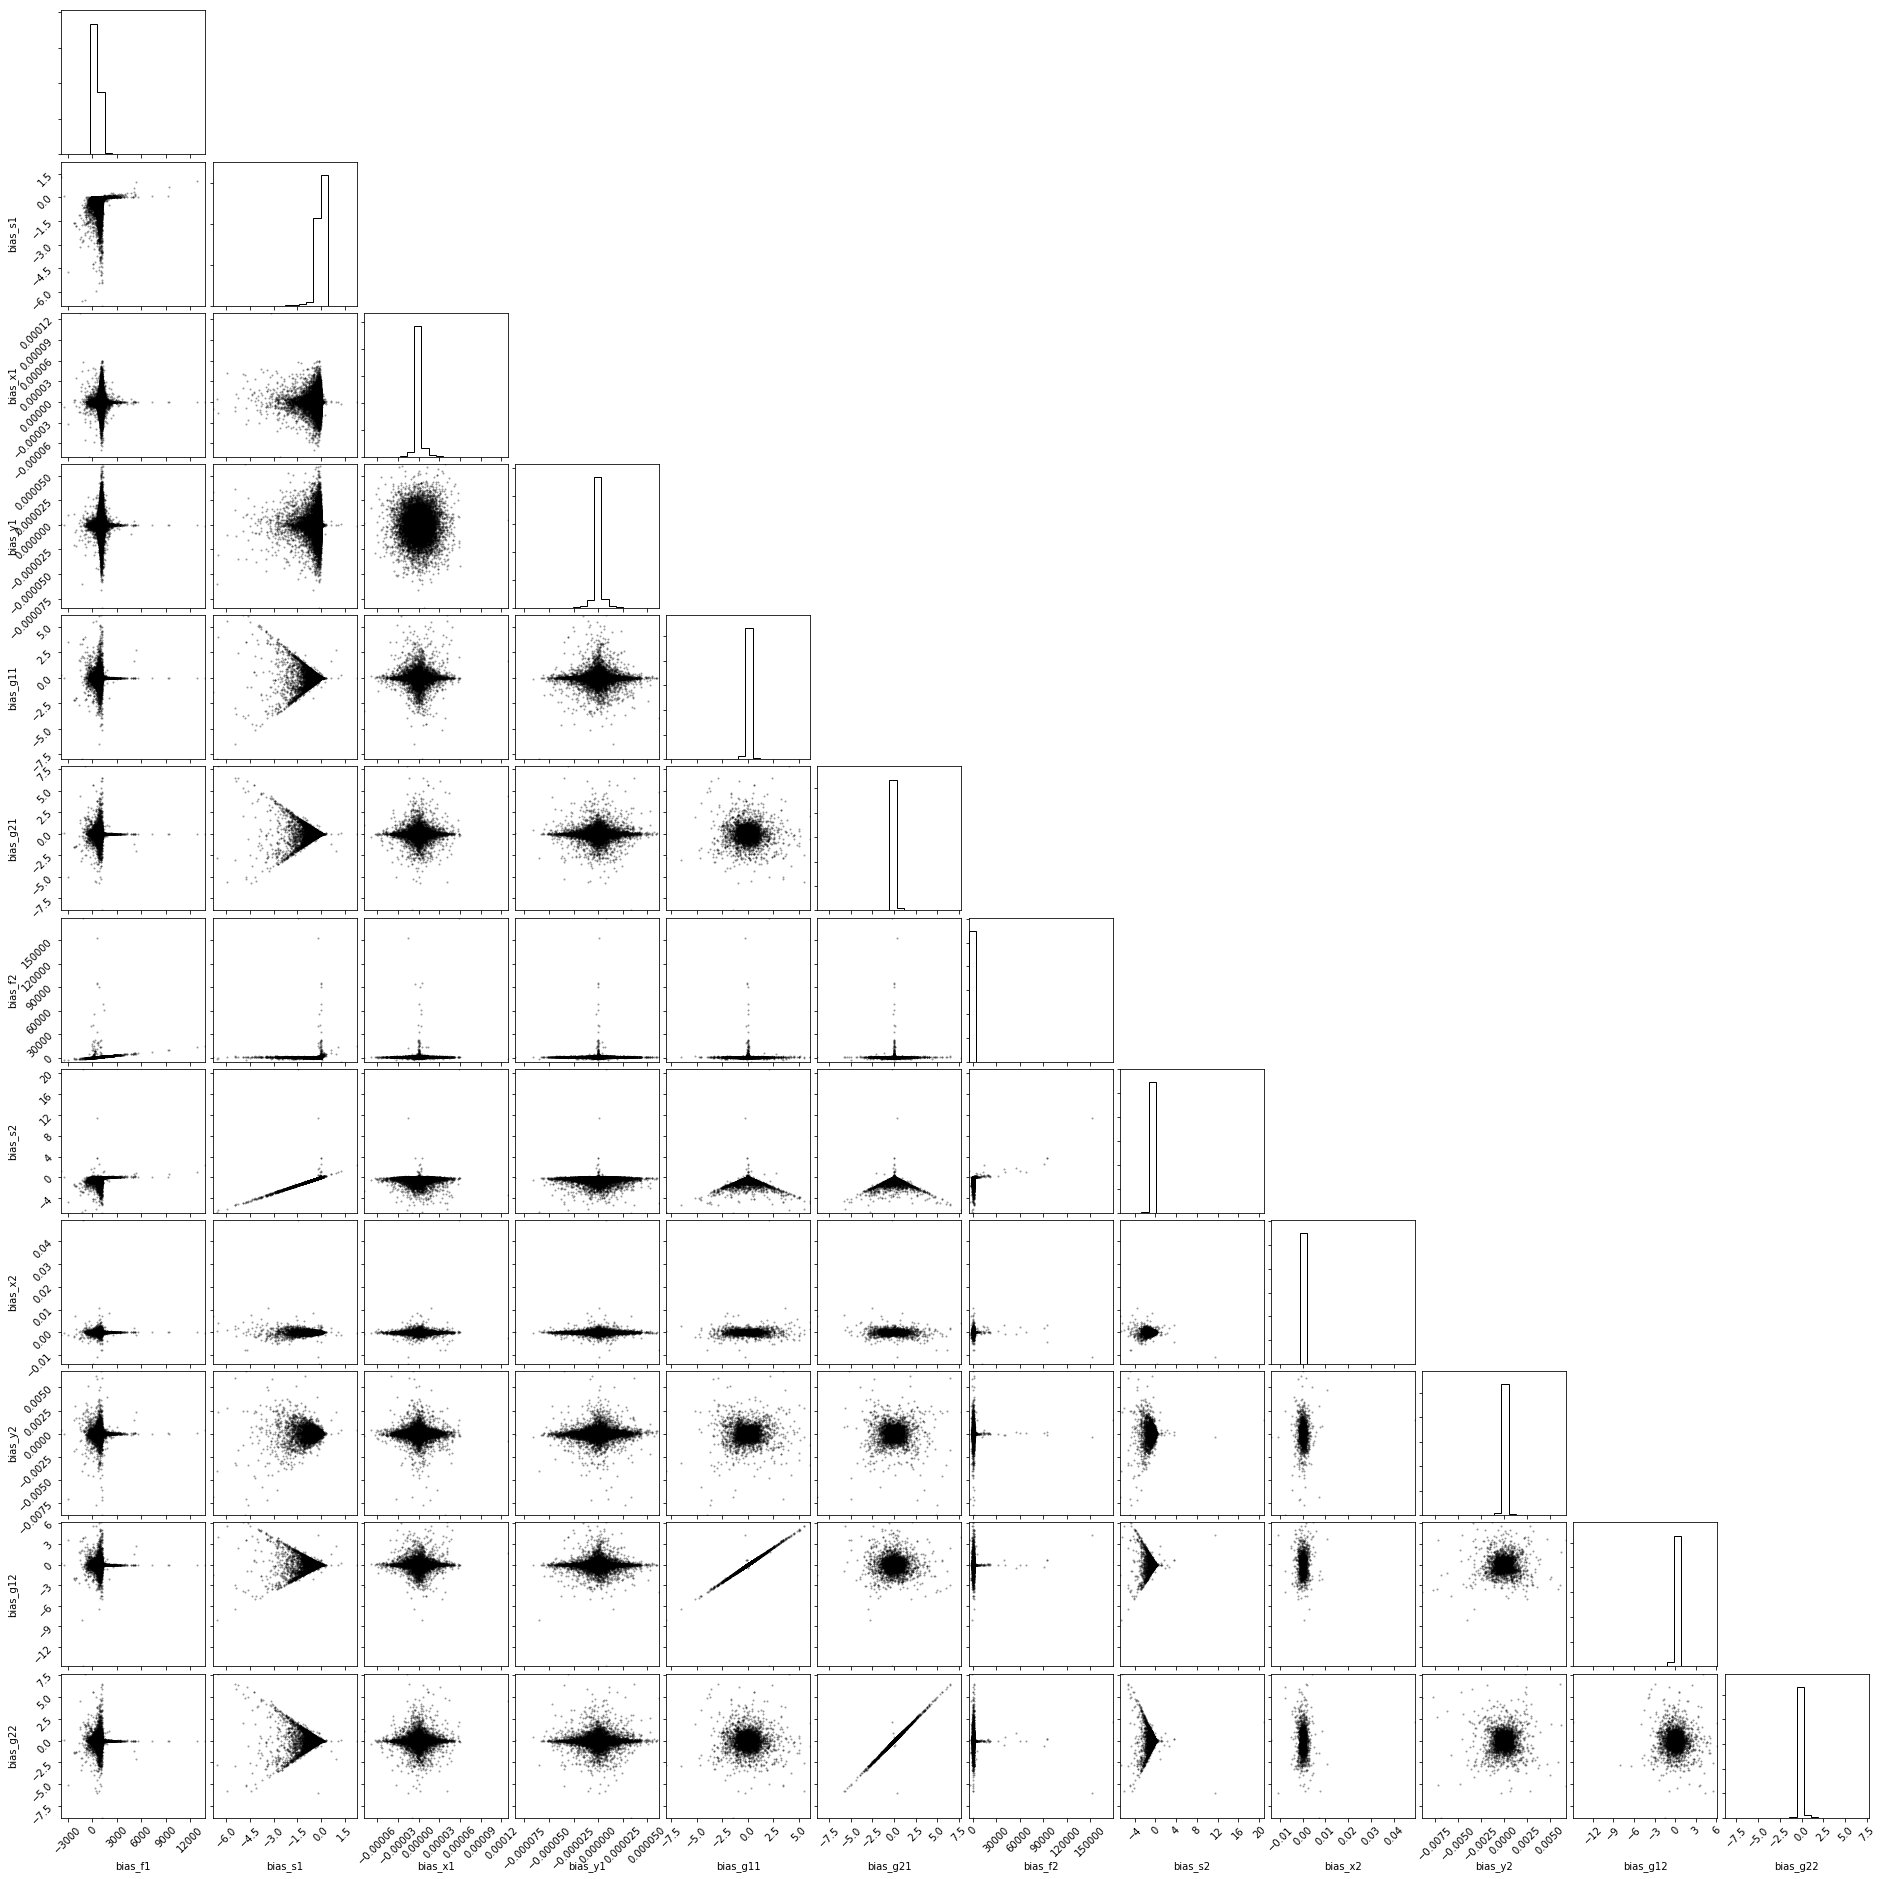

In [40]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4, #'markevery':4
                                                                                    }}
figure = corner.corner(all_biases, labels=all_params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
figure.savefig(os.path.join("data", 'ntriangle1.pdf'))


(-6, 1.5)

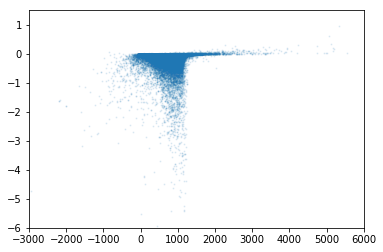

In [11]:
plt.figure()
plt.scatter( scat1['bias_f'], scat1['bias_s'], alpha = 0.1, s=1)
plt.xlim(-3000, 6000)
plt.ylim(-6, 1.5)

(-6, 1.5)

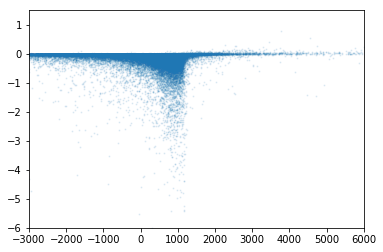

In [13]:
plt.figure()
plt.scatter( scat1['bias_f_grp'], scat1['bias_s_grp'], alpha = 0.1, s=1)
plt.xlim(-3000, 6000)
plt.ylim(-6, 1.5)

(-6e-06, 6e-06)

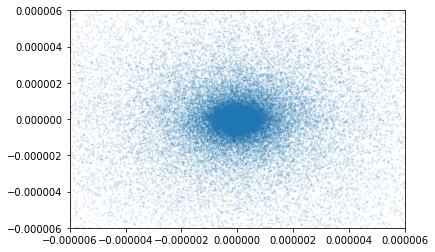

In [12]:
plt.figure()
plt.scatter( scat1['bias_x'], scat1['bias_y'], alpha = 0.1, s=1)
plt.xlim(-6e-6, 6e-6)
plt.ylim(-6e-6, 6e-6)



(-5, 5)

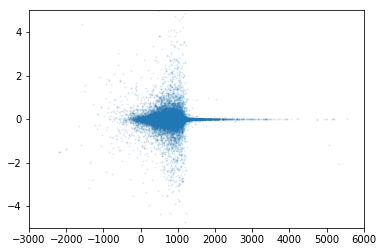

In [7]:
plt.figure()
plt.scatter( scat1['bias_f'], scat1['bias_g2'], alpha = 0.1, s=1)
plt.xlim(-3000, 6000)
plt.ylim(-5, 5)

(-5, 5)

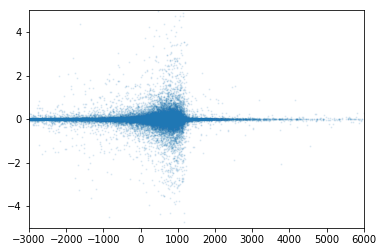

In [14]:
plt.figure()
plt.scatter( scat1['bias_f_grp'], scat1['bias_g2_grp'], alpha = 0.1, s=1)
plt.xlim(-3000, 6000)
plt.ylim(-5, 5)

In [10]:
np.min(scat1['flux'])

29257.875

(-2, 2)

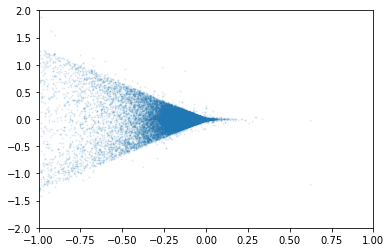

In [6]:
plt.figure()
plt.scatter( scat1['bias_s'], scat1['bias_g2'], alpha = 0.1, s=1)
plt.xlim(-1, 1)
plt.ylim(-2, 2)

# plt.figure()
# plt.scatter(scat1['bias_x'], scat1['bias_y'])
# plt.xlim(-1e-4, 1e-4)
# plt.ylim(-1e-4, 1e-4)



(-5, 5)

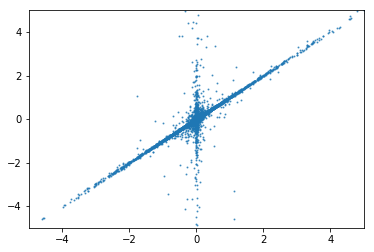

In [39]:
plt.scatter(all_cats[0]['bias_g1_grp'], all_cats[1]['bias_g1_grp'], s=1, alpha=0.7)
plt.xlim(-5,5)
plt.ylim(-5,5)

(array([282.,  46.,  42.,  29.,  14.,  12.,   9.,   5.,   5.,   8.,   8.,
          1.,   3.,   2.,   4.,   2.,   2.,   1.,   4.,   3.,   1.,   4.,
          4.,   0.,   1.,   2.,   0.,   1.,   1.,   2.,   2.,   0.,   2.,
          1.,   1.,   1.,   1.,   0.,   1.,   0.,   2.,   2.,   2.,   0.,
          3.,   2.,   0.,   1.,   4.,   2.,   3.,   0.,   0.,   1.,   1.,
          1.,   0.,   1.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,
         11.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

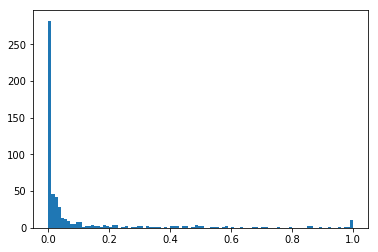

In [46]:
plt.hist(all_cats[0][ (all_cats[0]['bias_g1_grp']<.1) & (all_cats[1]['bias_g1_grp']>0.1)]["f_bulge"], bins=100)

## Blending on 

In [ ]:
biases_grp_1 = np.array([list(keep_quantiles(all_cats[0][param])) for param in params_grp]).T #.99 kept. 
biases_grp_2 = np.array([list(keep_quantiles(all_cats[1][param])) for param in params_grp]).T #.99 kept. 


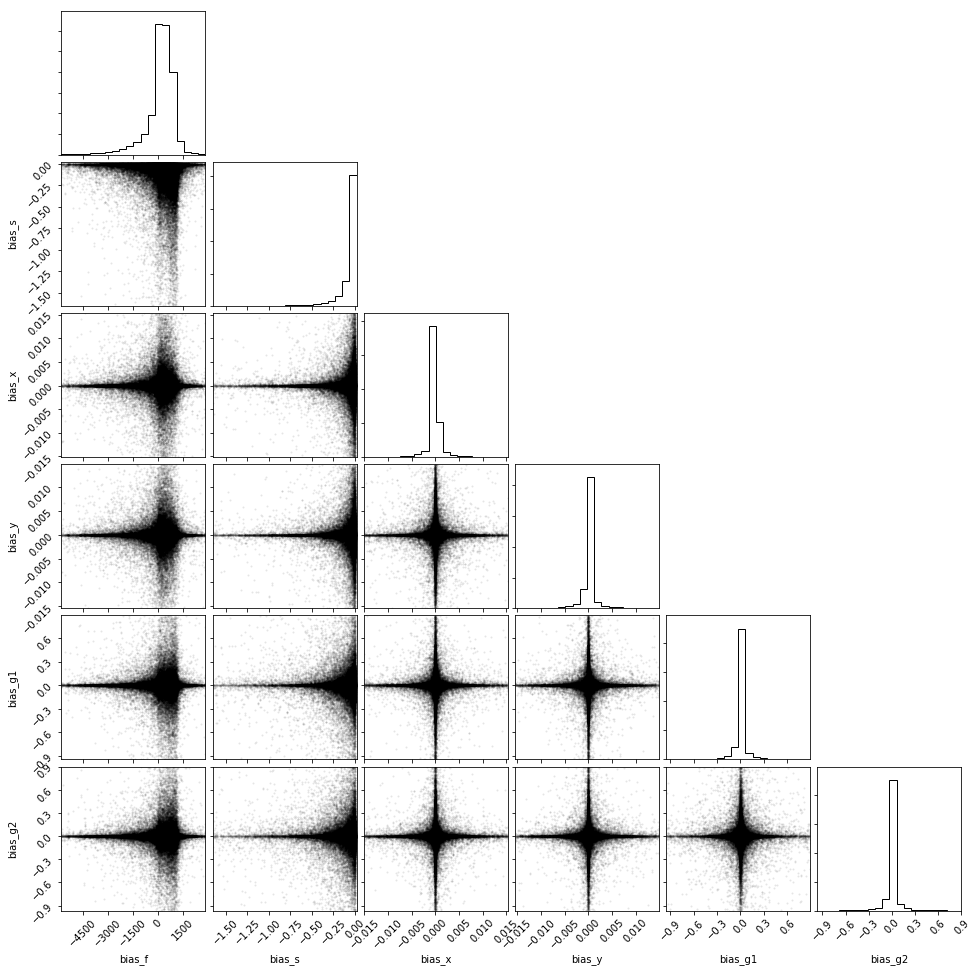

In [25]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quite':False, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.1, #'markevery':4
                                                                                    }}
figure = corner.corner(biases_grp, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);


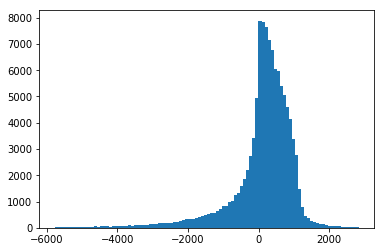

In [88]:
plt.hist(keep_quantiles(scat1['bias_f_grp']), bins=100);

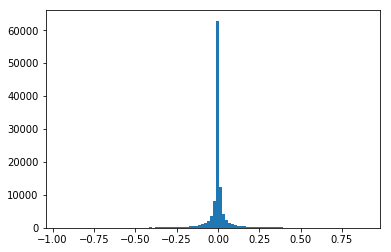

In [89]:
plt.hist(keep_quantiles(scat1['bias_g1_grp']),bins=100 );

In [83]:
np.quantile(scat1['bias_x_grp'],0.001)
min(scat1['bias_x_grp'])

-69461.67